# Prophet model on Finance dataset

In [26]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt
from prophet import Prophet

In [27]:
df = pd.read_csv("stocks.csv")
print(df)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [28]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [29]:
df.dropna(inplace=True)

missing_values_after_drop = df.isnull().sum()
print("Missing values in each column after dropping rows:")
print(missing_values_after_drop)

Missing values in each column after dropping rows:
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [30]:
df.rename(columns={'date': 'ds', 'close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

holidays = pd.DataFrame({
    'holiday': 'US_holidays',
    'ds': pd.to_datetime(['2023-12-25', '2024-01-01', '2024-07-04']),  # Add relevant dates
    'lower_window': 0,
    'upper_window': 1,
})

model = Prophet(
    daily_seasonality=True,
    yearly_seasonality=True,
    weekly_seasonality=True,
    seasonality_mode='additive',
    holidays=holidays
)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.fit(df)

future = model.make_future_dataframe(periods=30)

forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

13:22:26 - cmdstanpy - INFO - Chain [1] start processing
13:24:42 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
1284 2018-03-05  112.299175  -23.551814  243.789794
1285 2018-03-06  112.369384  -11.467146  238.184287
1286 2018-03-07  112.491494  -23.892060  239.588257
1287 2018-03-08  112.531831  -15.475887  232.436596
1288 2018-03-09  112.511227  -13.155448  242.151276


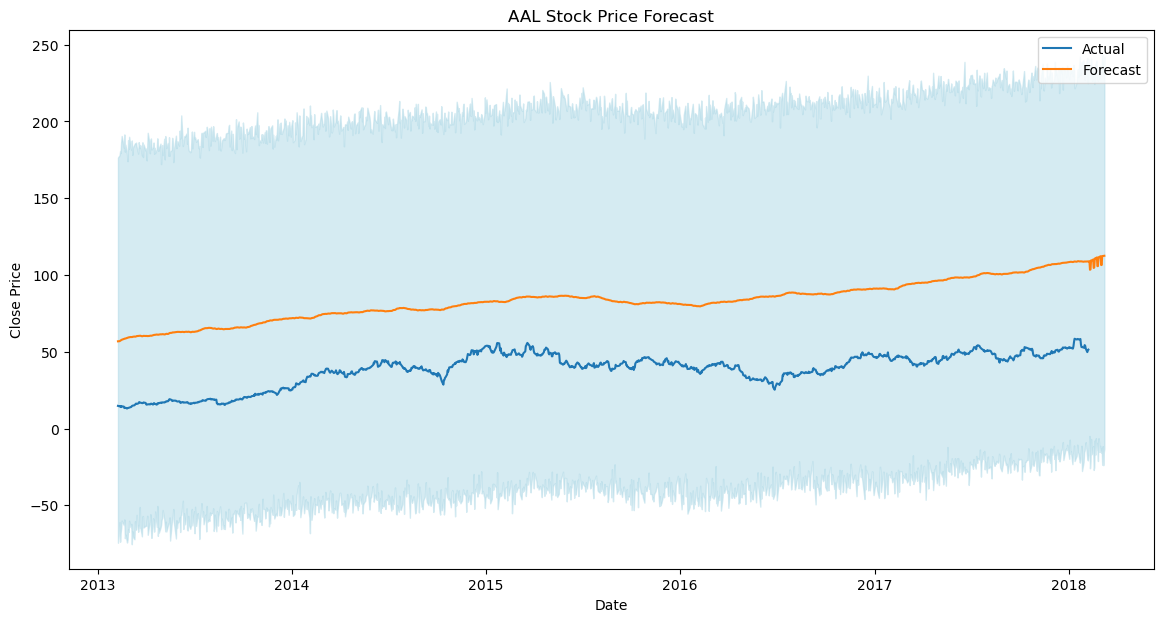

In [35]:
aal_df = df[df['Name'] == 'AAL']
plt.figure(figsize=(14, 7))
plt.plot(aal_df['ds'], aal_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAL Stock Price Forecast')
plt.legend()
plt.show()

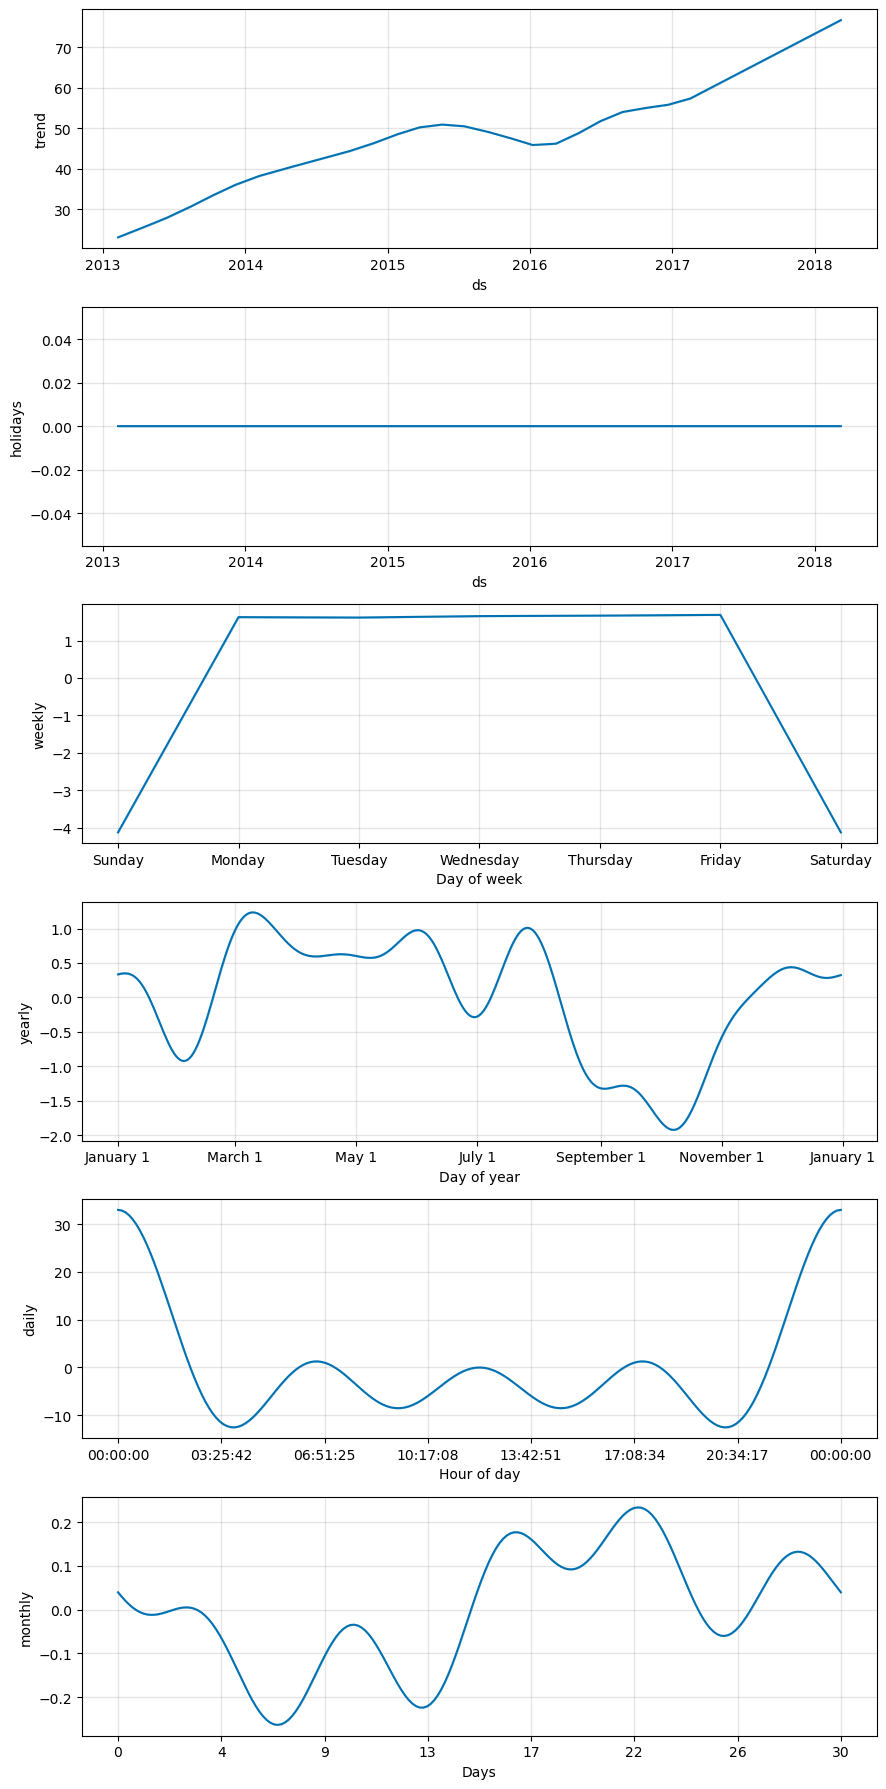

In [36]:
fig2 = model.plot_components(forecast)
plt.show()

In [37]:
import pickle
with open('prophet_stocks.pkl', 'wb') as f:
    pickle.dump(model, f)